## Imports

In [1]:
import random
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

## Data Preprocessing

In [2]:
root = 'C:\\Users\\Krishna\\IIT MADRAS\\Molecular Data Science and Informatics\\Assignment\\Assignment 1\\CrystalData\b\data'
files = sorted(glob.glob('%s\\*.poscar'%root))
print(f'Total number of data points are {len(files)}')

Total number of data points are 215


In [3]:
predictors = []
at_en = []
egap = []
eps_elec = []
eps_ion = []
eps_tot = []
n = len(files)

for i in range(n):
    with open(files[i]) as f:
        string = f.read()
    list_str = string.split('\n')
    
    target_list = list_str[0].split(' ')
    dummy=[]
    for j in target_list:
        if j != '':
            dummy.append(j)
    at_en.append(float(dummy[1]))
    egap.append(float(dummy[2]))
    eps_elec.append(float(dummy[3]))
    eps_ion.append(float(dummy[4]))
    eps_tot.append(float(dummy[5]))
    
    pred_list = list_str[6].split(' ')
    dummy=[]
    for j in pred_list:
        if j != '':
            dummy.append(j)
    pred_list = [int(j) for j in dummy]
    if len(pred_list) == 2:
        pred_list.append(0)
    pred_list = [k/sum(pred_list) for k in pred_list]
    predictors.append(pred_list)

In [165]:
with open(files[0]) as f:
    string = f.read()
print(string)

cod-2001647       6.4334275E+00 3.7676000E+00 2.7393300E+00 5.4144500E-01 3.2807750E+00    #! label, atEnergy (eV), egap (eV), eps_elec, eps_ion, eps_tot
1.0
  1.0276490000E+01   1.6515830000E-01   1.6034090000E-01
  1.8177520000E+00   6.3141700000E+00  -9.7529960000E-02
  1.7348840000E+00   2.1655910000E+00   5.2648280000E+00
C   H   O  
 16  20   8
Direct
  6.5026640000E-01   4.7089680000E-01   2.6080420000E-01
  3.4973370000E-01   5.2910340000E-01   7.3919490000E-01
  7.3005230000E-01   4.5481950000E-01   4.4966410000E-01
  2.6994740000E-01   5.4518020000E-01   5.5033570000E-01
  7.7831110000E-01   6.7955230000E-01   3.7982460000E-01
  2.2168840000E-01   3.2044690000E-01   6.2017700000E-01
  8.2780940000E-01   7.9338760000E-01   9.9707780000E-02
  1.7219060000E-01   2.0661270000E-01   9.0029430000E-01
  8.0927290000E-01   7.3080400000E-01   9.2693020000E-01
  1.9072750000E-01   2.6919670000E-01   7.3070180000E-02
  7.3529390000E-01   5.4167840000E-01   9.8663720000E-01
  2.647066000

## Model

In [4]:
def show_results(target_train,test_run,target_test,predictions,target):
    print(f'R2 score of train data = {r2_score(target_train, test_run)}')
    print(f'R2 score of test data = {r2_score(target_test, predictions)}')

    plt.figure(figsize = (6,4))

    plt.plot(trial_fit.history['loss'], label='loss')
    plt.plot(trial_fit.history['val_loss'], label='val_loss')
    plt.title("Losses vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Losses")
    plt.grid()
    plt.legend()


    fig = plt.figure(figsize = (21,6))
    ax = fig.add_subplot(1,3,1)
    ax.set_aspect('equal', adjustable='box')
    plt.scatter(target_train, test_run)
    plt.title("Actual Train Data vs Predicted Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.plot(target, target, 'k-')
    plt.grid()

    ax = fig.add_subplot(1,3,2)
    ax.set_aspect('equal', adjustable='box')
    plt.scatter(target_test, predictions)
    plt.title("Actual Test Data vs Predicted Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.plot(target_train, target_train, 'k-')
    plt.grid()

    ax = fig.add_subplot(1,3,3)
    ax.set_aspect('equal', adjustable='box')
    plt.scatter(target_train, test_run, label = 'Training Data')
    plt.scatter(target_test, predictions, label = 'Testing Data')
    plt.legend()
    plt.title("Actual Data vs Predicted Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.plot(target_train, target_train, 'k-')
    plt.grid()

### Atomization energy

In [110]:
# Scaling

sc = StandardScaler()
predictors_norm = sc.fit_transform(predictors)
target = np.array(at_en)

# Test train split

predictors_norm_train, predictors_norm_test, target_train, target_test = train_test_split
                                                (predictors_norm, target, test_size=0.20, random_state=8, shuffle=True)
n_cols = predictors_norm.shape[1]

# Model

def regression_model():
    model = Sequential()
    model.add(Dense(500, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = regression_model()

trial_fit_at = model.fit(predictors_norm_train, target_train, epochs=1000, verbose=1, validation_split=0.01)
train_pred_at = model.predict(predictors_norm_train)
test_pred_at = model.predict(predictors_norm_test)

Epoch 1/1000
6/6 [==============================] - 1s 23ms/step - loss: 39.4559 - val_loss: 41.8639
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 35.4976 - val_loss: 37.1346
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 31.9698 - val_loss: 32.6451
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 28.5671 - val_loss: 28.4254
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 25.3384 - val_loss: 24.3365
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 22.1022 - val_loss: 20.5290
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 19.0915 - val_loss: 16.7174
Epoch 8/1000
6/6 [==============================] - 0s 7ms/step - loss: 16.0900 - val_loss: 13.1824
Epoch 9/1000
6/6 [==============================] - 0s 8ms/step - loss: 13.4995 - val_loss: 9.9774
Epoch 10/1000
6/6 [==============================] - 0s 7ms/step - loss: 10.8346 - val_loss: 7.0646


Epoch 165/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0574 - val_loss: 0.0123
Epoch 166/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0596 - val_loss: 0.0081
Epoch 167/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0622 - val_loss: 0.0050
Epoch 168/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0617 - val_loss: 0.0088
Epoch 169/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0503 - val_loss: 0.0058
Epoch 170/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0405 - val_loss: 0.0061
Epoch 171/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0522 - val_loss: 0.0052
Epoch 172/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0541 - val_loss: 0.0065
Epoch 173/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0545 - val_loss: 0.0059
Epoch 174/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0504 - val_loss: 0.0028


Epoch 247/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0503 - val_loss: 0.0033
Epoch 248/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0522 - val_loss: 0.0119
Epoch 249/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0527 - val_loss: 0.0113
Epoch 250/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0519 - val_loss: 0.0056
Epoch 251/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0591 - val_loss: 0.0024
Epoch 252/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0516 - val_loss: 0.0071
Epoch 253/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0398 - val_loss: 0.0087
Epoch 254/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0493 - val_loss: 0.0072
Epoch 255/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0519 - val_loss: 0.0072
Epoch 256/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0517 - val_loss: 0.0038


6/6 [==============================] - 0s 6ms/step - loss: 0.0425 - val_loss: 0.0069
Epoch 411/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0430 - val_loss: 0.0043
Epoch 412/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0380 - val_loss: 0.0029
Epoch 413/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0465 - val_loss: 0.0015
Epoch 414/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0379 - val_loss: 0.0032
Epoch 415/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0363 - val_loss: 0.0055
Epoch 416/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0346 - val_loss: 0.0075
Epoch 417/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0398 - val_loss: 0.0057
Epoch 418/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0433 - val_loss: 0.0069
Epoch 419/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0439 - val_loss: 0.0027
Epoch 420/1000


Epoch 492/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0384 - val_loss: 0.0010
Epoch 493/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0366 - val_loss: 0.0067
Epoch 494/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0460 - val_loss: 0.0081
Epoch 495/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0480 - val_loss: 0.0092
Epoch 496/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0357 - val_loss: 0.0050
Epoch 497/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0410 - val_loss: 0.0033
Epoch 498/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0409 - val_loss: 0.0029
Epoch 499/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0521 - val_loss: 0.0035
Epoch 500/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0450 - val_loss: 0.0133
Epoch 501/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0076


Epoch 655/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0395 - val_loss: 0.0244
Epoch 656/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0308 - val_loss: 0.0051
Epoch 657/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0413 - val_loss: 0.0102
Epoch 658/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0414 - val_loss: 0.0138
Epoch 659/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.0017
Epoch 660/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0341 - val_loss: 0.0028
Epoch 661/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0424 - val_loss: 0.0021
Epoch 662/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0345 - val_loss: 6.3765e-04
Epoch 663/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0441 - val_loss: 0.0075
Epoch 664/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0398 - val_loss: 0.

Epoch 818/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0485 - val_loss: 2.5923e-04
Epoch 819/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0374 - val_loss: 0.0089
Epoch 820/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0420 - val_loss: 0.0511
Epoch 821/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0435 - val_loss: 8.4430e-04
Epoch 822/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0439 - val_loss: 0.0040
Epoch 823/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0383 - val_loss: 0.0096
Epoch 824/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0391 - val_loss: 0.0259
Epoch 825/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0318 - val_loss: 0.0019
Epoch 826/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0436 - val_loss: 9.1566e-04
Epoch 827/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0397 - val_

6/6 [==============================] - 0s 7ms/step - loss: 0.0394 - val_loss: 3.4014e-04
Epoch 981/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0362 - val_loss: 0.0080
Epoch 982/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0371 - val_loss: 0.0060
Epoch 983/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0340 - val_loss: 0.0055
Epoch 984/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0470 - val_loss: 0.0026
Epoch 985/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0353 - val_loss: 0.0026
Epoch 986/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0352 - val_loss: 3.8449e-04
Epoch 987/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0409 - val_loss: 0.0135
Epoch 988/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0306 - val_loss: 0.0074
Epoch 989/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0402 - val_loss: 0.0136
Epoch 9

R2 score of train data = 0.9821081252552027
R2 score of test data = 0.9811872084186273


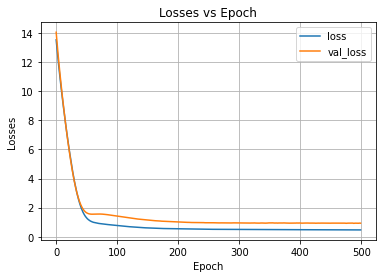

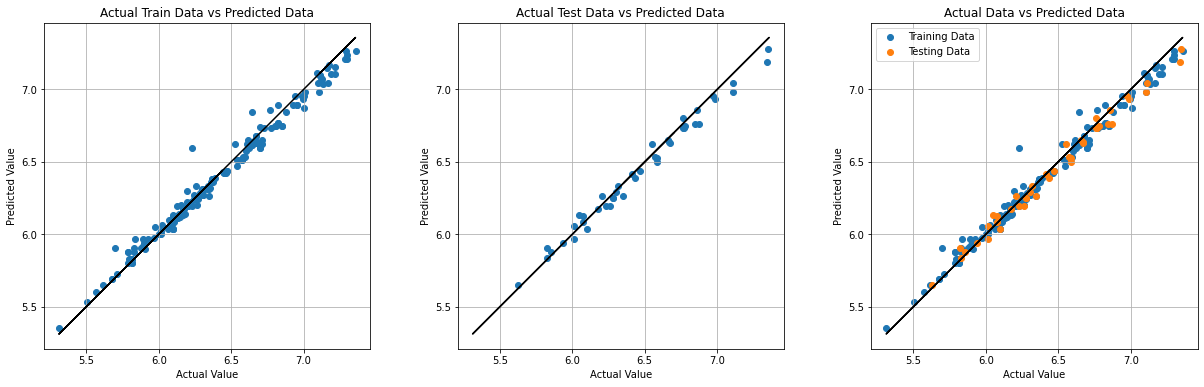

In [111]:
show_results(target_train,train_pred_at,target_test,test_pred_at,target)

### Energy gap

In [21]:
# Scaling

sc = StandardScaler()
predictors_norm = sc.fit_transform(predictors)
target = np.array(egap)

# Test train split

predictors_norm_train, predictors_norm_test, target_train, target_test = train_test_split(predictors_norm, target, test_size=0.20, random_state=48, shuffle=True)
n_cols = predictors_norm.shape[1]

# Model

model = Sequential()

        
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.1))

#model.add(Dense(500, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(500,activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(500,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
lr = 1e-3
optimizer = keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mean_squared_error')


trial_fit = model.fit(predictors_norm_train, target_train, epochs=1000, verbose=1, validation_split=0.1)
train_pred = model.predict(predictors_norm_train)
test_pred = model.predict(predictors_norm_test)

Epoch 1/1000
5/5 [==============================] - 1s 68ms/step - loss: 14.2599 - val_loss: 13.5970
Epoch 2/1000
5/5 [==============================] - 0s 20ms/step - loss: 13.0936 - val_loss: 12.5203
Epoch 3/1000
5/5 [==============================] - 0s 17ms/step - loss: 12.1034 - val_loss: 11.5018
Epoch 4/1000
5/5 [==============================] - 0s 15ms/step - loss: 11.1045 - val_loss: 10.5521
Epoch 5/1000
5/5 [==============================] - 0s 16ms/step - loss: 10.2085 - val_loss: 9.6500
Epoch 6/1000
5/5 [==============================] - 0s 17ms/step - loss: 9.3365 - val_loss: 8.8044
Epoch 7/1000
5/5 [==============================] - 0s 17ms/step - loss: 8.5229 - val_loss: 7.9962
Epoch 8/1000
5/5 [==============================] - 0s 17ms/step - loss: 7.7177 - val_loss: 7.2391
Epoch 9/1000
5/5 [==============================] - 0s 18ms/step - loss: 6.9496 - val_loss: 6.5318
Epoch 10/1000
5/5 [==============================] - 0s 16ms/step - loss: 6.2246 - val_loss: 5.8576


Epoch 83/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.5801 - val_loss: 0.9333
Epoch 84/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.5770 - val_loss: 0.9295
Epoch 85/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.5996 - val_loss: 0.9253
Epoch 86/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.5695 - val_loss: 0.9346
Epoch 87/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.5571 - val_loss: 0.9394
Epoch 88/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.5533 - val_loss: 0.9365
Epoch 89/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.6099 - val_loss: 0.9334
Epoch 90/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.5994 - val_loss: 0.9456
Epoch 91/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.5819 - val_loss: 0.9420
Epoch 92/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.5847 - val_loss: 0.9474


5/5 [==============================] - 0s 17ms/step - loss: 0.4898 - val_loss: 0.8730
Epoch 246/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5165 - val_loss: 0.8621
Epoch 247/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5423 - val_loss: 0.8747
Epoch 248/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.5270 - val_loss: 0.8792
Epoch 249/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.5554 - val_loss: 0.8900
Epoch 250/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4774 - val_loss: 0.9078
Epoch 251/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.5302 - val_loss: 0.9100
Epoch 252/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4822 - val_loss: 0.9208
Epoch 253/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.5093 - val_loss: 0.9010
Epoch 254/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5113 - val_loss: 0.8780
Epoch

5/5 [==============================] - 0s 21ms/step - loss: 0.5290 - val_loss: 0.8858
Epoch 408/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4688 - val_loss: 0.8781
Epoch 409/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.4959 - val_loss: 0.8826
Epoch 410/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4972 - val_loss: 0.8708
Epoch 411/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4987 - val_loss: 0.8879
Epoch 412/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4883 - val_loss: 0.8891
Epoch 413/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.4955 - val_loss: 0.9001
Epoch 414/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4686 - val_loss: 0.8874
Epoch 415/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.4682 - val_loss: 0.8635
Epoch 416/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.4778 - val_loss: 0.8676
Epoch

5/5 [==============================] - 0s 15ms/step - loss: 0.4175 - val_loss: 0.8982
Epoch 570/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4852 - val_loss: 0.8962
Epoch 571/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4515 - val_loss: 0.8969
Epoch 572/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.4649 - val_loss: 0.9010
Epoch 573/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4696 - val_loss: 0.8966
Epoch 574/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4780 - val_loss: 0.9035
Epoch 575/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4638 - val_loss: 0.8896
Epoch 576/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4617 - val_loss: 0.8902
Epoch 577/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4466 - val_loss: 0.8720
Epoch 578/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4874 - val_loss: 0.8751
Epoch

5/5 [==============================] - 0s 20ms/step - loss: 0.5087 - val_loss: 0.9420
Epoch 732/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4353 - val_loss: 0.9483
Epoch 733/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.4638 - val_loss: 0.9543
Epoch 734/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4713 - val_loss: 0.9421
Epoch 735/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.4367 - val_loss: 0.9103
Epoch 736/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4529 - val_loss: 0.9134
Epoch 737/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.4449 - val_loss: 0.9149
Epoch 738/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4517 - val_loss: 0.9475
Epoch 739/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4423 - val_loss: 0.9512
Epoch 740/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4758 - val_loss: 0.9596
Epoch

5/5 [==============================] - 0s 17ms/step - loss: 0.4855 - val_loss: 0.9022
Epoch 894/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.4562 - val_loss: 0.8946
Epoch 895/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.4762 - val_loss: 0.9112
Epoch 896/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4320 - val_loss: 0.9177
Epoch 897/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4461 - val_loss: 0.9256
Epoch 898/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4455 - val_loss: 0.9221
Epoch 899/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4426 - val_loss: 0.9192
Epoch 900/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4470 - val_loss: 0.9071
Epoch 901/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4535 - val_loss: 0.9130
Epoch 902/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4419 - val_loss: 0.9348
Epoch

R2 score of train data = 0.7704008696949497
R2 score of test data = 0.745529827676009


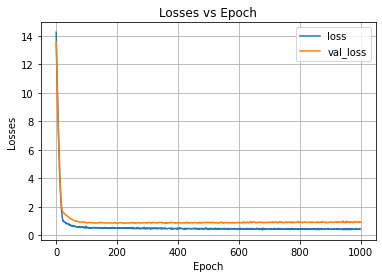

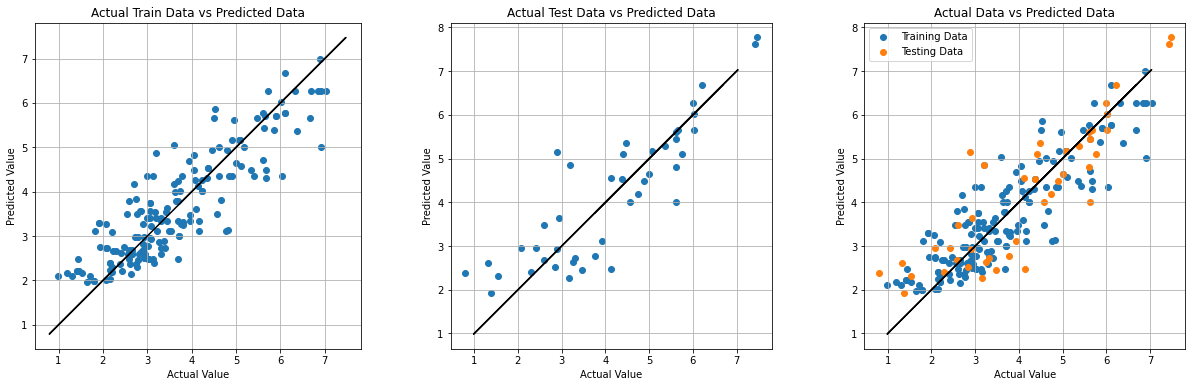

In [22]:
show_results(target_train,train_pred,target_test,test_pred,target)

## EPS_elec

In [35]:
# Scaling

sc = StandardScaler()
predictors_norm = sc.fit_transform(predictors)
target = np.array(eps_elec)

# Test train split

predictors_norm_train, predictors_norm_test, target_train, target_test = train_test_split(predictors_norm, target, test_size=0.20, random_state=8, shuffle=True)
n_cols = predictors_norm.shape[1]

# Model

model = Sequential()

        
model.add(Dense(300, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.1))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.1))
#model.add(Dense(500,activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(500,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
lr = 1e-3
optimizer = keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mean_squared_error')


trial_fit = model.fit(predictors_norm_train, target_train, epochs=1000, verbose=1, validation_split=0.1)
train_pred = model.predict(predictors_norm_train)
test_pred = model.predict(predictors_norm_test)

Epoch 1/1000
5/5 [==============================] - 1s 75ms/step - loss: 6.4894 - val_loss: 4.9782
Epoch 2/1000
5/5 [==============================] - 0s 18ms/step - loss: 2.9397 - val_loss: 2.5027
Epoch 3/1000
5/5 [==============================] - 0s 18ms/step - loss: 1.7199 - val_loss: 2.1827
Epoch 4/1000
5/5 [==============================] - 0s 17ms/step - loss: 1.9318 - val_loss: 1.9712
Epoch 5/1000
5/5 [==============================] - 0s 17ms/step - loss: 1.4926 - val_loss: 1.6995
Epoch 6/1000
5/5 [==============================] - 0s 18ms/step - loss: 1.2534 - val_loss: 1.6691
Epoch 7/1000
5/5 [==============================] - 0s 18ms/step - loss: 1.2251 - val_loss: 1.5157
Epoch 8/1000
5/5 [==============================] - 0s 19ms/step - loss: 1.0370 - val_loss: 1.2600
Epoch 9/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.8754 - val_loss: 1.0615
Epoch 10/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.8236 - val_loss: 0.8976
Epoch 11/

5/5 [==============================] - 0s 24ms/step - loss: 0.0732 - val_loss: 0.0585
Epoch 84/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0661 - val_loss: 0.0614
Epoch 85/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0796 - val_loss: 0.0603
Epoch 86/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0713 - val_loss: 0.0529
Epoch 87/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0720 - val_loss: 0.0544
Epoch 88/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0722 - val_loss: 0.0583
Epoch 89/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0632 - val_loss: 0.0540
Epoch 90/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0769 - val_loss: 0.0570
Epoch 91/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0650 - val_loss: 0.0574
Epoch 92/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0663 - val_loss: 0.0553
Epoch 93/1000


5/5 [==============================] - 0s 29ms/step - loss: 0.0604 - val_loss: 0.0490
Epoch 246/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0644 - val_loss: 0.0484
Epoch 247/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0554 - val_loss: 0.0499
Epoch 248/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0666 - val_loss: 0.0493
Epoch 249/1000
5/5 [==============================] - 0s 46ms/step - loss: 0.0604 - val_loss: 0.0453
Epoch 250/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0649 - val_loss: 0.0487
Epoch 251/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0586 - val_loss: 0.0477
Epoch 252/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0626 - val_loss: 0.0521
Epoch 253/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0641 - val_loss: 0.0458
Epoch 254/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0640 - val_loss: 0.0453
Epoch

5/5 [==============================] - 0s 19ms/step - loss: 0.0698 - val_loss: 0.0495
Epoch 408/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0568 - val_loss: 0.0488
Epoch 409/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0613 - val_loss: 0.0501
Epoch 410/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0549 - val_loss: 0.0460
Epoch 411/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0501 - val_loss: 0.0469
Epoch 412/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0601 - val_loss: 0.0468
Epoch 413/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0702 - val_loss: 0.0500
Epoch 414/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0616 - val_loss: 0.0468
Epoch 415/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0592 - val_loss: 0.0538
Epoch 416/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0601 - val_loss: 0.0438
Epoch

5/5 [==============================] - 0s 21ms/step - loss: 0.0526 - val_loss: 0.0508
Epoch 570/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0549 - val_loss: 0.0465
Epoch 571/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0556 - val_loss: 0.0624
Epoch 572/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0551 - val_loss: 0.0486
Epoch 573/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0580 - val_loss: 0.0495
Epoch 574/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0595 - val_loss: 0.0524
Epoch 575/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0469 - val_loss: 0.0500
Epoch 576/1000
5/5 [==============================] - 0s 44ms/step - loss: 0.0504 - val_loss: 0.0582
Epoch 577/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0581 - val_loss: 0.0458
Epoch 578/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0560 - val_loss: 0.0554
Epoch

5/5 [==============================] - 0s 17ms/step - loss: 0.0617 - val_loss: 0.0569
Epoch 732/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0524 - val_loss: 0.0492
Epoch 733/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0536 - val_loss: 0.0614
Epoch 734/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0576 - val_loss: 0.0487
Epoch 735/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0637 - val_loss: 0.0544
Epoch 736/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0531 - val_loss: 0.0479
Epoch 737/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0548 - val_loss: 0.0533
Epoch 738/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0603 - val_loss: 0.0505
Epoch 739/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0581 - val_loss: 0.0501
Epoch 740/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0554 - val_loss: 0.0486
Epoch

5/5 [==============================] - 0s 36ms/step - loss: 0.0514 - val_loss: 0.0558
Epoch 894/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0603 - val_loss: 0.0515
Epoch 895/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0496 - val_loss: 0.0611
Epoch 896/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0553 - val_loss: 0.0485
Epoch 897/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0505 - val_loss: 0.0530
Epoch 898/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0510 - val_loss: 0.0549
Epoch 899/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0542 - val_loss: 0.0467
Epoch 900/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0525 - val_loss: 0.0483
Epoch 901/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0532 - val_loss: 0.0498
Epoch 902/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0607 - val_loss: 0.0499
Epoch

R2 score of train data = 0.7330840862259485
R2 score of test data = 0.7430867016195075


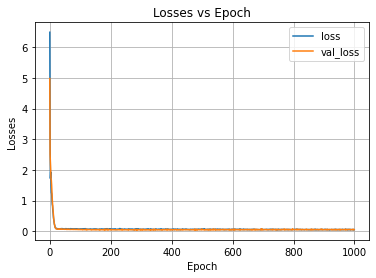

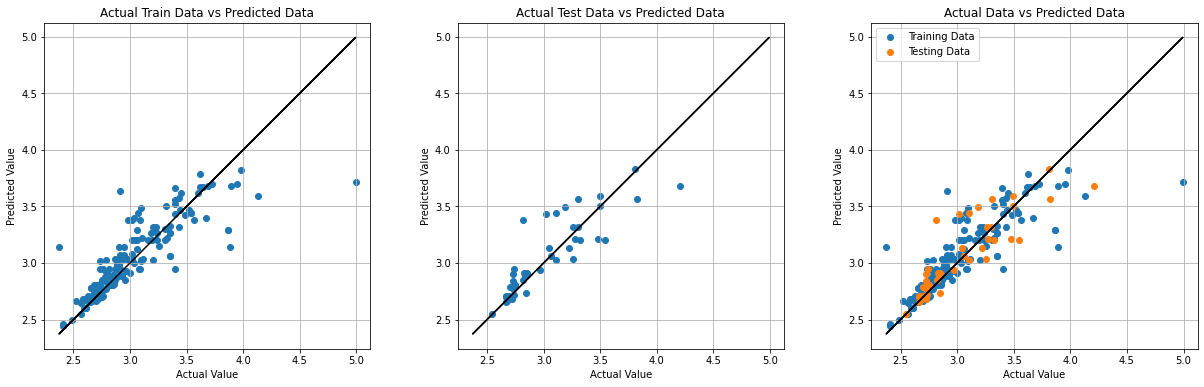

In [37]:
show_results(target_train,train_pred,target_test,test_pred,target)

## EPS_ion

In [93]:
### Scaling

sc = StandardScaler()
predictors_norm = sc.fit_transform(predictors)
target = np.array(eps_ion)

# Test train split

predictors_norm_train, predictors_norm_test, target_train, target_test = train_test_split(predictors_norm, target, test_size=0.20, random_state=84, shuffle=True)
n_cols = predictors_norm.shape[1]

# Model

model = Sequential()

        
model.add(Dense(500, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
lr = 1e-2
optimizer = keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mean_squared_error')


trial_fit = model.fit(predictors_norm_train, target_train, epochs=1000, verbose=1, validation_split=0.1)
train_pred = model.predict(predictors_norm_train)
test_pred = model.predict(predictors_norm_test)

Epoch 1/1000
5/5 [==============================] - 1s 84ms/step - loss: 348.7178 - val_loss: 0.4032
Epoch 2/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.3527 - val_loss: 0.1281
Epoch 3/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.1765 - val_loss: 0.1489
Epoch 4/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.1281 - val_loss: 0.1169
Epoch 5/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.1985 - val_loss: 0.1443
Epoch 6/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.1190 - val_loss: 0.0381
Epoch 7/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.1244 - val_loss: 0.0611
Epoch 8/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.1000 - val_loss: 0.0532
Epoch 9/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0693 - val_loss: 0.0499
Epoch 10/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0751 - val_loss: 0.0178
Epoch 1

Epoch 83/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0373 - val_loss: 0.0178
Epoch 84/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0442 - val_loss: 0.0265
Epoch 85/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0461 - val_loss: 0.0214
Epoch 86/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0405 - val_loss: 0.0222
Epoch 87/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0422 - val_loss: 0.0203
Epoch 88/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0356 - val_loss: 0.0206
Epoch 89/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0406 - val_loss: 0.0230
Epoch 90/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0389 - val_loss: 0.0161
Epoch 91/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0361 - val_loss: 0.0214
Epoch 92/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0438 - val_loss: 0.0178


5/5 [==============================] - 0s 30ms/step - loss: 0.0347 - val_loss: 0.0217
Epoch 246/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0367 - val_loss: 0.0237
Epoch 247/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0395 - val_loss: 0.0155
Epoch 248/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0370 - val_loss: 0.0297
Epoch 249/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0372 - val_loss: 0.0112
Epoch 250/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0370 - val_loss: 0.0118
Epoch 251/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0338 - val_loss: 0.0321
Epoch 252/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0387 - val_loss: 0.0130
Epoch 253/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0343 - val_loss: 0.0197
Epoch 254/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0336 - val_loss: 0.0234
Epoch

5/5 [==============================] - 0s 22ms/step - loss: 0.0327 - val_loss: 0.0212
Epoch 408/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0301 - val_loss: 0.0243
Epoch 409/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0279 - val_loss: 0.0191
Epoch 410/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0314 - val_loss: 0.0205
Epoch 411/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0262 - val_loss: 0.0191
Epoch 412/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0359 - val_loss: 0.0201
Epoch 413/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0330 - val_loss: 0.0277
Epoch 414/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0326 - val_loss: 0.0216
Epoch 415/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0380 - val_loss: 0.0140
Epoch 416/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0329 - val_loss: 0.0167
Epoch

5/5 [==============================] - 0s 28ms/step - loss: 0.0328 - val_loss: 0.0134
Epoch 570/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0337 - val_loss: 0.0224
Epoch 571/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0357 - val_loss: 0.0151
Epoch 572/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0280 - val_loss: 0.0186
Epoch 573/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0332 - val_loss: 0.0141
Epoch 574/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0319 - val_loss: 0.0130
Epoch 575/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0337 - val_loss: 0.0216
Epoch 576/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0338 - val_loss: 0.0169
Epoch 577/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0371 - val_loss: 0.0171
Epoch 578/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0353 - val_loss: 0.0151
Epoch

5/5 [==============================] - 0s 19ms/step - loss: 0.0316 - val_loss: 0.0243
Epoch 732/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0388 - val_loss: 0.0183
Epoch 733/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0326 - val_loss: 0.0170
Epoch 734/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0369 - val_loss: 0.0256
Epoch 735/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0295 - val_loss: 0.0225
Epoch 736/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0359 - val_loss: 0.0257
Epoch 737/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0243 - val_loss: 0.0198
Epoch 738/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0365 - val_loss: 0.0180
Epoch 739/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0374 - val_loss: 0.0216
Epoch 740/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0351 - val_loss: 0.0212
Epoch

5/5 [==============================] - 0s 24ms/step - loss: 0.0344 - val_loss: 0.0142
Epoch 894/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0334 - val_loss: 0.0162
Epoch 895/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0321 - val_loss: 0.0183
Epoch 896/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0351 - val_loss: 0.0217
Epoch 897/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0334 - val_loss: 0.0215
Epoch 898/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0349 - val_loss: 0.0133
Epoch 899/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0297 - val_loss: 0.0240
Epoch 900/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0328 - val_loss: 0.0165
Epoch 901/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0322 - val_loss: 0.0117
Epoch 902/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0327 - val_loss: 0.0167
Epoch

R2 score of train data = 0.7302927937050213
R2 score of test data = 0.7207677949173429


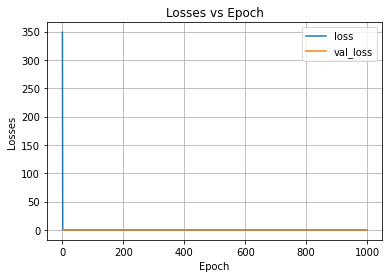

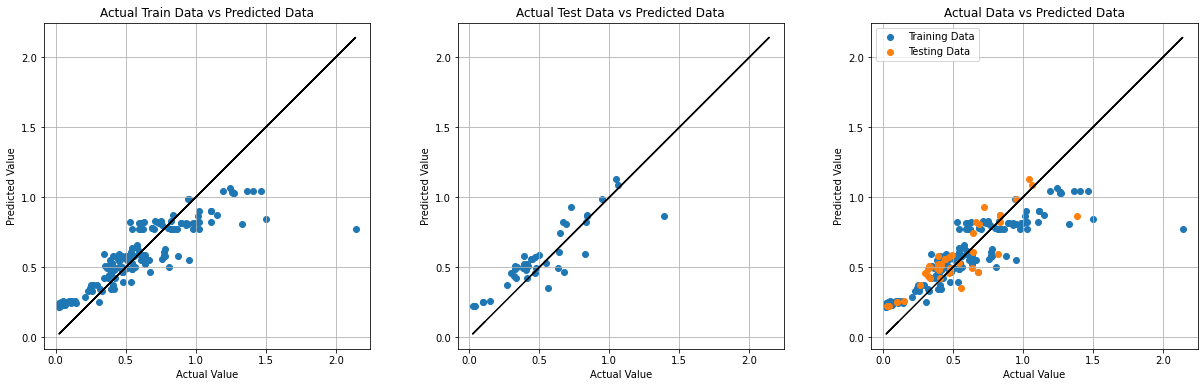

In [94]:
show_results(target_train,train_pred,target_test,test_pred,target)

## EPS_tot

In [107]:
# Scaling

sc = StandardScaler()
predictors_norm = sc.fit_transform(predictors)
target = np.array(eps_tot)

# Test train split

predictors_norm_train, predictors_norm_test, target_train, target_test = train_test_split(predictors_norm, target, test_size=0.20, random_state=5, shuffle=True)
n_cols = predictors_norm.shape[1]

# Model

model = Sequential()

        
model.add(Dense(600, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
#model.add(Dense(400,activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(500,activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(500,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
lr = 1e-2
optimizer = keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mean_squared_error')


trial_fit = model.fit(predictors_norm_train, target_train, epochs=1000, verbose=1, validation_split=0.1)
train_pred = model.predict(predictors_norm_train)
test_pred = model.predict(predictors_norm_test)

Epoch 1/1000
5/5 [==============================] - 1s 51ms/step - loss: 6.6832 - val_loss: 2.6015
Epoch 2/1000
5/5 [==============================] - 0s 13ms/step - loss: 3.3460 - val_loss: 3.9162
Epoch 3/1000
5/5 [==============================] - 0s 13ms/step - loss: 1.1810 - val_loss: 0.9213
Epoch 4/1000
5/5 [==============================] - 0s 14ms/step - loss: 1.2712 - val_loss: 0.1811
Epoch 5/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3842 - val_loss: 0.6981
Epoch 6/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4262 - val_loss: 0.1431
Epoch 7/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.2376 - val_loss: 0.1511
Epoch 8/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2563 - val_loss: 0.1752
Epoch 9/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.2476 - val_loss: 0.0966
Epoch 10/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.2249 - val_loss: 0.0768
Epoch 11/

5/5 [==============================] - 0s 12ms/step - loss: 0.1413 - val_loss: 0.0263
Epoch 84/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1707 - val_loss: 0.0245
Epoch 85/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1317 - val_loss: 0.0546
Epoch 86/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1755 - val_loss: 0.0847
Epoch 87/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1479 - val_loss: 0.0375
Epoch 88/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1772 - val_loss: 0.0396
Epoch 89/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1718 - val_loss: 0.0341
Epoch 90/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1649 - val_loss: 0.1358
Epoch 91/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.2018 - val_loss: 0.0829
Epoch 92/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.2297 - val_loss: 0.1608
Epoch 93/1000


5/5 [==============================] - 0s 12ms/step - loss: 0.1659 - val_loss: 0.1222
Epoch 246/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1492 - val_loss: 0.0381
Epoch 247/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1381 - val_loss: 0.0297
Epoch 248/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1281 - val_loss: 0.0211
Epoch 249/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1236 - val_loss: 0.0314
Epoch 250/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.1276 - val_loss: 0.0286
Epoch 251/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1404 - val_loss: 0.0368
Epoch 252/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1208 - val_loss: 0.0474
Epoch 253/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1408 - val_loss: 0.0175
Epoch 254/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1440 - val_loss: 0.0286
Epoch

5/5 [==============================] - 0s 15ms/step - loss: 0.1278 - val_loss: 0.0385
Epoch 408/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1314 - val_loss: 0.0325
Epoch 409/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.1369 - val_loss: 0.0387
Epoch 410/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1412 - val_loss: 0.0366
Epoch 411/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.1543 - val_loss: 0.0813
Epoch 412/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1523 - val_loss: 0.0807
Epoch 413/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1576 - val_loss: 0.0445
Epoch 414/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1387 - val_loss: 0.0473
Epoch 415/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.1450 - val_loss: 0.0255
Epoch 416/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1224 - val_loss: 0.0234
Epoch

5/5 [==============================] - 0s 17ms/step - loss: 0.1326 - val_loss: 0.0157
Epoch 570/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1179 - val_loss: 0.0112
Epoch 571/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1186 - val_loss: 0.0226
Epoch 572/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.1135 - val_loss: 0.0221
Epoch 573/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1170 - val_loss: 0.0180
Epoch 574/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.1249 - val_loss: 0.0216
Epoch 575/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1060 - val_loss: 0.0162
Epoch 576/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1251 - val_loss: 0.0152
Epoch 577/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1188 - val_loss: 0.0284
Epoch 578/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1220 - val_loss: 0.0361
Epoch

5/5 [==============================] - 0s 13ms/step - loss: 0.1103 - val_loss: 0.0205
Epoch 732/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1213 - val_loss: 0.0509
Epoch 733/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1196 - val_loss: 0.0223
Epoch 734/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1161 - val_loss: 0.0157
Epoch 735/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1177 - val_loss: 0.0394
Epoch 736/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1221 - val_loss: 0.0214
Epoch 737/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1170 - val_loss: 0.0298
Epoch 738/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.1169 - val_loss: 0.0143
Epoch 739/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.1082 - val_loss: 0.0388
Epoch 740/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.1213 - val_loss: 0.0164
Epoch

5/5 [==============================] - 0s 15ms/step - loss: 0.1038 - val_loss: 0.0344
Epoch 894/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.1190 - val_loss: 0.0153
Epoch 895/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1194 - val_loss: 0.0396
Epoch 896/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1131 - val_loss: 0.0131
Epoch 897/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1179 - val_loss: 0.0202
Epoch 898/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1105 - val_loss: 0.0154
Epoch 899/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1148 - val_loss: 0.0286
Epoch 900/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.1040 - val_loss: 0.0198
Epoch 901/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1048 - val_loss: 0.0238
Epoch 902/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1032 - val_loss: 0.0178
Epoch

R2 score of train data = 0.7490626542723815
R2 score of test data = 0.7388639037259573


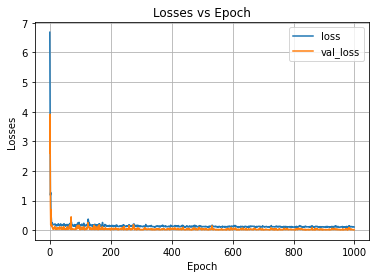

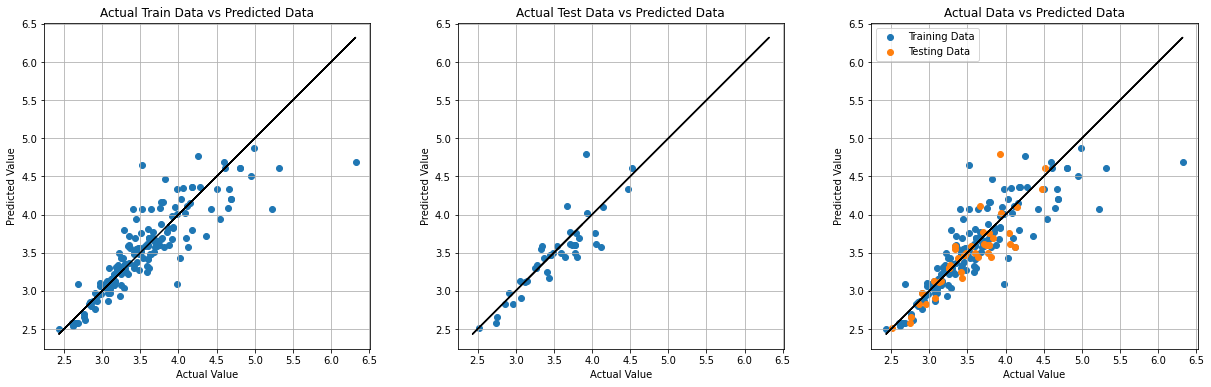

In [108]:
show_results(target_train,train_pred,target_test,test_pred,target)